In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv'

In [3]:
!pip install wget -q

In [4]:
import wget
wget.download('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv')

100% [....................................................] 80876 / 80876

'course_lead_scoring (3).csv'

In [5]:
df = pd.read_csv('course_lead_scoring.csv')

In [6]:
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


QUESTION 1

In [7]:
df['industry'].nunique()

7

<Axes: xlabel='count', ylabel='industry'>

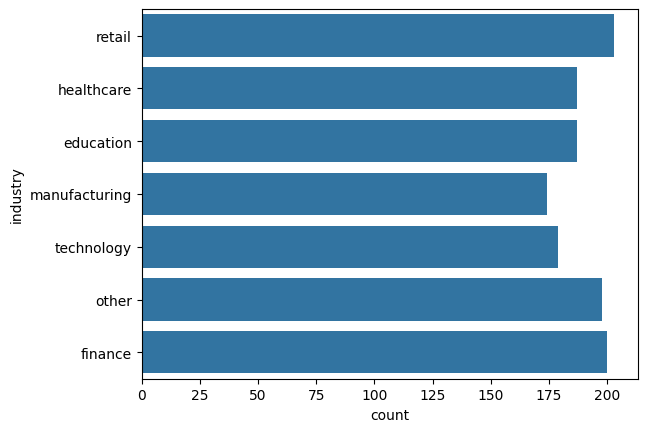

In [8]:
sns.countplot(df['industry'])

QUESTION 2

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1334 non-null   object 
 1   industry                  1328 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1281 non-null   float64
 4   employment_status         1362 non-null   object 
 5   location                  1399 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB


In [10]:
df.columns

Index(['lead_source', 'industry', 'number_of_courses_viewed', 'annual_income',
       'employment_status', 'location', 'interaction_count', 'lead_score',
       'converted'],
      dtype='object')

In [11]:
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
df_full_train,df_test =  train_test_split(df, test_size = 0.2, random_state = 1)
df_train,df_val =  train_test_split(df_full_train, test_size = 0.25, random_state = 1)

In [14]:
len(df_train),len(df_val),len(df_test) 

(876, 293, 293)

In [15]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [16]:
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

In [17]:
del df_train['converted']
del df_val['converted']
del df_test['converted']


In [18]:
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [19]:
df['lead_source']= df['lead_source'].fillna('NA')
df['industry']= df['industry'].fillna('NA')
df['annual_income']= df['annual_income'].fillna(0)
df['employment_status']= df['employment_status'].fillna('NA')
df['location']= df['location'].fillna('NA')


In [20]:
numerical = ['number_of_courses_viewed','annual_income','interaction_count','lead_score']
category= ['lead_source', 'industry', 'employment_status', 'location']

In [21]:
df_full_train[category]

,lead_source,industry,employment_status,location
98,referral,NaN,employed,asia
1188,social_media,education,unemployed,north_america
1407,events,finance,self_employed,europe
1083,social_media,finance,student,north_america
404,referral,NaN,student,australia
...,...,...,...,...
715,referral,NaN,unemployed,africa
905,social_media,other,employed,south_america
1096,events,finance,self_employed,asia
235,referral,technology,employed,north_america


In [22]:
df_full_train[numerical]

,number_of_courses_viewed,annual_income,interaction_count,lead_score
98,1,56659.0,4,0.75
1188,2,66171.0,2,0.66
1407,1,66523.0,3,0.64
1083,1,56746.0,3,0.98
404,0,55449.0,4,0.47
...,...,...,...,...
715,2,35103.0,0,0.88
905,1,66006.0,5,0.64
1096,2,73688.0,2,0.07
235,2,76723.0,3,0.49


In [23]:
df_full_train[numerical].corrwith(df_full_train.converted)

number_of_courses_viewed    0.434872
annual_income               0.095067
interaction_count           0.387251
lead_score                  0.196394
dtype: float64

QUESTION 3

In [24]:
from sklearn.metrics import mutual_info_score

In [25]:
def mutual_info_converted_score(series):
    return mutual_info_score(series, df_full_train.converted)

In [27]:
mi = df_full_train[category].apply(mutual_info_converted_score)
mi.sort_values()

ValueError: Input contains NaN

QUESTION 4

In [28]:
from sklearn.feature_extraction import DictVectorizer

In [29]:
train_dicts = df_train[category + numerical].to_dict(orient = 'records')
dv = DictVectorizer(sparse = False)
X_train = dv.fit_transform(train_dicts)
val_dicts = df_val[category + numerical].to_dict(orient = 'records')
X_val = dv.transform(val_dicts)

In [30]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [31]:
df_full_train[numerical] = (df_full_train[numerical] > 0).astype(int)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
dicts_full_train = df_full_train[category + numerical].to_dict(orient = 'records')

In [34]:
dv = DictVectorizer(sparse = False)
X_full_train = dv.fit_transform(dicts_full_train)
X_full_train

array([[ 1.,  0.,  1., ...,  0.,  0.,  1.],
       [ 1.,  0.,  0., ...,  1.,  0.,  1.],
       [ 1.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 1.,  0.,  0., ...,  0.,  0.,  1.],
       [ 1.,  0.,  1., ...,  1.,  0.,  1.],
       [ 1., nan,  0., ...,  0.,  1.,  1.]], shape=(1169, 31))

In [35]:
y_full_train = df_full_train.converted.values

In [36]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_full_train, y_full_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [37]:
df_test[numerical] = (df_test[numerical] > 0).astype(int)

In [ ]:
dicts_test = df_test[category + numerical].to_dict(orient = 'records')

In [ ]:
X_test = dv.transform(dicts_test)

In [ ]:
y_pred = model.predict_proba(X_test)[:, 1]

In [ ]:
 converted = (y_pred >= 0)

In [ ]:
accuracy =(converted == y_test).mean()
print(round(accuracy, 2))

QUESTION 6

In [157]:
param = {
   'C': [0.01],
    'solver':'liblinear',
    'max_iter':1000,
    'random_state':42
}
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [158]:
df_test[numerical] = (df_test[numerical] > 0).astype(int)
dicts_test = df_test[category + numerical].to_dict(orient = 'records')
X_test = dv.transform(dicts_test)
y_pred = model.predict_proba(X_test)[:, 1]
converted = (y_pred >= 0)
accuracy =(converted == y_test).mean()
print(round(accuracy, 3))

0.648


In [161]:

model = LogisticRegression(C = 0.1)
model.fit(X_full_train, y_full_train)
df_test[numerical] = (df_test[numerical] > 0).astype(int)
dicts_test = df_test[category + numerical].to_dict(orient = 'records')
X_test = dv.transform(dicts_test)
y_pred = model.predict_proba(X_test)[:, 1]
converted = (y_pred >= 0)
accuracy =(converted == y_test).mean()
print(round(accuracy, 3))

0.648


In [162]:
model = LogisticRegression(C = 100)
model.fit(X_full_train, y_full_train)
df_test[numerical] = (df_test[numerical] > 0).astype(int)
dicts_test = df_test[category + numerical].to_dict(orient = 'records')
X_test = dv.transform(dicts_test)
y_pred = model.predict_proba(X_test)[:, 1]
converted = (y_pred >= 0)
accuracy =(converted == y_test).mean()
print(round(accuracy, 3))

0.648
